In [1]:
# Data Manipulation and Visualization 
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, plotly_express as px

#Hide API Key 
import creds

# setting theme style and seaborn Palette 
sns.set_theme(context = 'notebook', style='darkgrid', palette='muted')


from fredapi import Fred


# 1. Create a Fred Object

In [2]:
fred = Fred(api_key=creds.fred_key)

In [3]:
# Search for economic data on Fred

sp_search = fred.search('S&P', order_by='popularity')

In [4]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-11-11,2023-11-11,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-11-09,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-11-10 08:38:02-06:00,93,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-11-11,2023-11-11,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-10-31 08:12:01-05:00,88,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-11-11,2023-11-11,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-11-09,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-11-10 08:38:09-06:00,83,This data represents the effective yield of th...
SP500,SP500,2023-11-11,2023-11-11,S&P 500,2013-11-11,2023-11-10,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-11-10 19:10:58-06:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2023-11-11,2023-11-11,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,81,Household data are collected as of March. As ...


<Axes: title={'center': 'S&P 500'}>

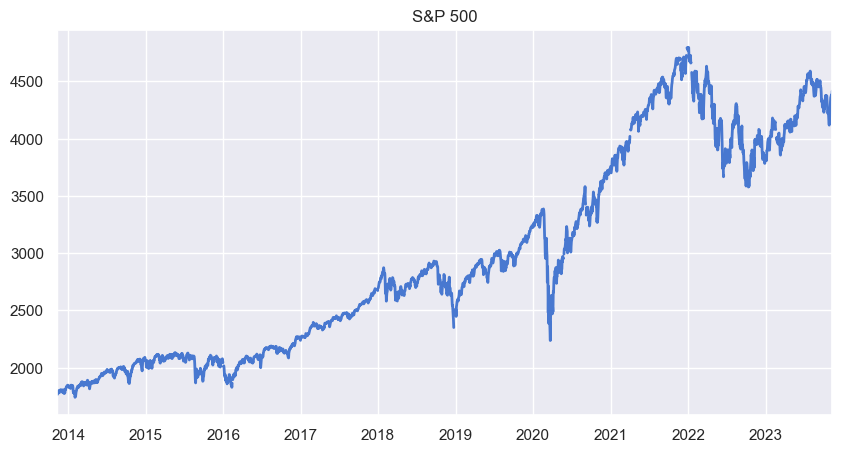

In [5]:
# Pull Raw Data 

sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10,5), title='S&P 500', lw=2)


# Pull and Join Multiple Data Series 

In [18]:
# filtering a unemployment rate dataframe with a Monthly update frequency  

#it's not just by state (Hebert fix)

 
uemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))     # search for umemployment rate times series in Fred that has a monthly frequency
uemp_df = uemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')  # Query Seasonally Adjusted and Percent as units 
uemp_df = uemp_df.loc[uemp_df['title'].str.contains('Unemployment Rate')]  # filter titles to those containing the phrase 'Unemployment Rate'
uemp_df = uemp_df.loc[uemp_df['id'].str.len() == 4]   # filter Series id to those with 4 words only (lenght of the string)

In [20]:
# dataframe with time series for all the US States + Puerto rico 
uemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2023-11-11,2023-11-11,Unemployment Rate in California,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:53:02-05:00,60,None
TXUR,TXUR,2023-11-11,2023-11-11,Unemployment Rate in Texas,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:52:02-05:00,54,None
NYUR,NYUR,2023-11-11,2023-11-11,Unemployment Rate in New York,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:53:03-05:00,52,None
FLUR,FLUR,2023-11-11,2023-11-11,Unemployment Rate in Florida,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:53:04-05:00,48,None
OHUR,OHUR,2023-11-11,2023-11-11,Unemployment Rate in Ohio,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:52:03-05:00,41,None
MIUR,MIUR,2023-11-11,2023-11-11,Unemployment Rate in Michigan,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:53:05-05:00,39,None
ALUR,ALUR,2023-11-11,2023-11-11,Unemployment Rate in Alabama,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:53:04-05:00,38,None
MNUR,MNUR,2023-11-11,2023-11-11,Unemployment Rate in Minnesota,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:53:10-05:00,35,None
KYUR,KYUR,2023-11-11,2023-11-11,Unemployment Rate in Kentucky,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:53:10-05:00,17,None


In [21]:
all_results = []


for myid in uemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

In [25]:
uemp_states = pd.concat(all_results, axis=1)

In [34]:
px.line(uemp_states)